# Trabalho #5 - Otimização de Hiperparâmetros e Regularização

O objetivo deste trabalho é retomar a classificação multiclasse do trabalho anterior. Mas, desta vez, com a liberdade de poder otimizar os hiperparâmetros, usar técnicas de regularização e de data augmentation.

O modelo deste trabalho é livre. Como sugestão, podem usar o mesmo notebook do trabalho anterior, aplicando as mudanças necessárias. Mas também deixo livre para refazerem o notebook, caso achem necessário.

## Coloque aqui o seu nome

Nome: WALLACE DE CASTRO GALVÃO


## Importando Bibliotecas Necessárias

In [9]:
import numpy as np
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Usar todos os dados de treinamento (60.000 exemplos)
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Normalização e redimensionamento
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # (28, 28, 1) para CNN
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding para os rótulos
Y_train_hot = to_categorical(Y_train, 10)
Y_test_hot = to_categorical(Y_test, 10)

## Data Augmentation

In [10]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

## Função de Criação do Modelo CNN

In [11]:
def build_cnn_model(input_shape, lamb):
    model = models.Sequential()
    
    # Primeira camada convolucional
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Segunda camada convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Terceira camada convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Flatten para transformar em vetor
    model.add(layers.Flatten())
    
    # Camada densa
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dropout(0.5))
    
    # Camada de saída
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

## Compilação e Otimização

In [12]:
# Parâmetros de regularização e taxa de aprendizado
lamb = 0.0002
learning_rate = 0.001

# Criar o modelo CNN
cnn_model = build_cnn_model((28, 28, 1), lamb)

# Compilação do modelo
cnn_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Treinamento

In [13]:
# Treinamento com data augmentation
history = cnn_model.fit(datagen.flow(X_train, Y_train_hot, batch_size=64),
                        epochs=30,
                        validation_data=(X_val, Y_val_hot),
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)

Epoch 1/30


  1/938 ━━━━━━━━━━━━━━━━━━━━ 42:48 3s/step - accuracy: 0.0938 - loss: 4.1626

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 54ms/step - accuracy: 0.3959 - loss: 1.8032 - val_accuracy: 0.7368 - val_loss: 0.7706 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.6096 - loss: 1.1167 - val_accuracy: 0.7248 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.6525 - loss: 1.0294 - val_accuracy: 0.7628 - val_loss: 0.7319 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.6677 - loss: 0.9847 - val_accuracy: 0.7752 - val_loss: 0.6620 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.6854 - loss: 0.9362 - val_accuracy: 0.7652 - val_loss: 0.6817 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6979 - loss: 0.9158 - val_accuracy: 0.7790 - val_loss: 0.6627 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.7070 - loss: 0.8893

## Avaliação do Modelo

In [14]:
# Avaliação nos dados de teste
custo_e_metricas_test = cnn_model.evaluate(X_test, Y_test_hot)
print(f"Perda no Teste: {custo_e_metricas_test[0]:.4f}, Acurácia no Teste: {custo_e_metricas_test[1]:.4f}")

 19/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8133 - loss: 0.5631

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8171 - loss: 0.5594
Perda no Teste: 0.5668, Acurácia no Teste: 0.8153


## Salvar o Modelo

In [15]:
# Salvar o modelo treinado
cnn_model.save('cnn_model_fashion_mnist_optimized.h5')
print("Modelo salvo como 'cnn_model_fashion_mnist_optimized.h5'.")

Modelo salvo como 'cnn_model_fashion_mnist_optimized.h5'.


## Visualização dos Resultados

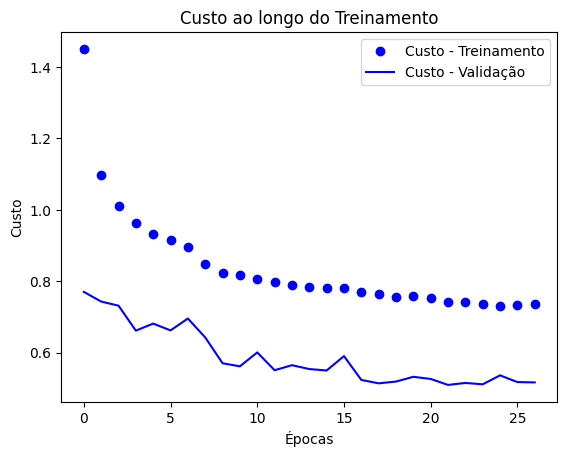

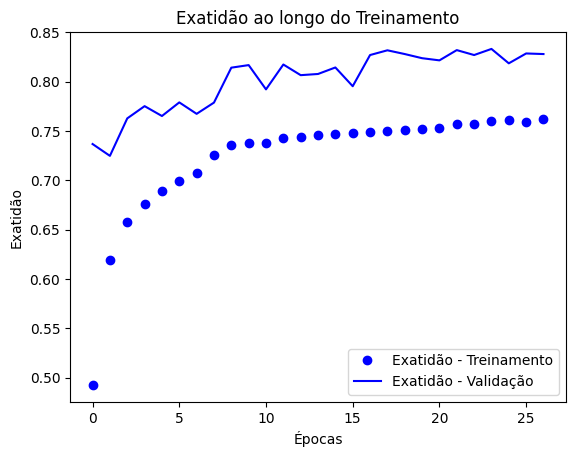

In [16]:
import matplotlib.pyplot as plt

# Plotando Custo e Exatidão
history_dict = history.history
custo = history_dict['loss']
val_custo = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Gráfico de Custo
plt.plot(custo, 'bo', label='Custo - Treinamento')
plt.plot(val_custo, 'b', label='Custo - Validação')
plt.title('Custo ao longo do Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico de Exatidão
plt.plot(acc, 'bo', label='Exatidão - Treinamento')
plt.plot(val_acc, 'b', label='Exatidão - Validação')
plt.title('Exatidão ao longo do Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.legend()
plt.show()